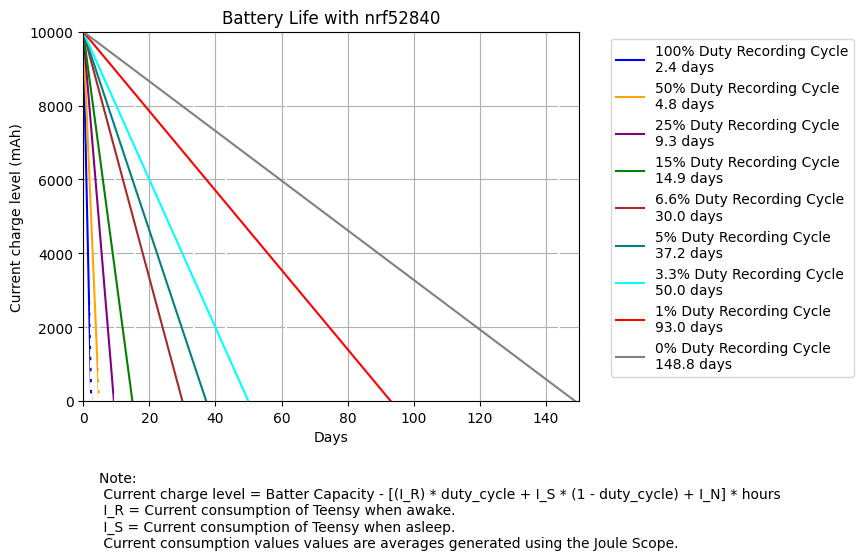

In [77]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 1.6
Duty_Cycle0 = 0
Duty_Cycle1 = 1
Duty_Cycle2 = 0.01
Duty_Cycle3 = 0.15
Duty_Cycle4 = 0.25
Duty_Cycle5 = 0.5
Duty_Cycle6 = 0.05
Duty_Cycle7 = 0.033
Duty_Cycle8 = 0.066


def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
  avg_current = ((record_current ) * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M
  num = str(round((battery_capacity / avg_current) / 24, 1))
  string = num + " days"
  return string


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life with nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y(duty_cycle):
    avg_current = (I_R) * duty_cycle + I_S * (1 - duty_cycle) + I_M
    return BatteryCap - (avg_current * x_hours)

  y0 = calculate_y(Duty_Cycle0)  # Only sleep current for 0% duty cycle
  y1 = calculate_y(Duty_Cycle1)
  y2 = calculate_y(Duty_Cycle2)
  y3 = calculate_y(Duty_Cycle3)
  y4 = calculate_y(Duty_Cycle4)
  y5 = calculate_y(Duty_Cycle5)
  y6 = calculate_y(Duty_Cycle6)
  y7 = calculate_y(Duty_Cycle7)
  y8 = calculate_y(Duty_Cycle8)

  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, y1, label=f"100% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle1, BatteryCap)}", color="blue")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle1 + I_S * (1 - Duty_Cycle1))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y5, label=f"50% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle5, BatteryCap)}", color="orange")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle5 + I_S * (1 - Duty_Cycle5))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y4, label=f"25% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle4, BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle4 + I_S * (1 - Duty_Cycle4))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y3, label=f"15% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle3, BatteryCap)}", color="green")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle3 + I_S * (1 - Duty_Cycle3))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y8, label=f"6.6% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle8, BatteryCap)}", color="brown")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle8 + I_S * (1 - Duty_Cycle8))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y6, label=f"5% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle6, BatteryCap)}", color="teal")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle6 + I_S * (1 - Duty_Cycle6))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y7, label=f"3.3% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle7, BatteryCap)}", color="cyan")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle7 + I_S * (1 - Duty_Cycle7))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y2, label=f"1% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle2, BatteryCap)}", color="red")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle2 + I_S * (1 - Duty_Cycle2))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y0, label=f"0% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle0, BatteryCap)}", color="grey")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle0 + I_S * (1 - Duty_Cycle0))) / 24, color="white", linestyle="--")


  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
 

  plt.figtext(0.15, -0.2, "Note: \n Current charge level = Batter Capacity - [(I_R) * duty_cycle + I_S * (1 - duty_cycle) + I_N] * hours \n I_R = Current consumption of Teensy when awake. \n I_S = Current consumption of Teensy when asleep. \n Current consumption values values are averages generated using the Joule Scope.", ha="left", fontsize=10, va="bottom")
  plt.ylim(0, 10000)
  plt.xlim(0, 150)
  plt.show()



# Example usage:
plot_linear_function()  # Still not needed for your battery plot

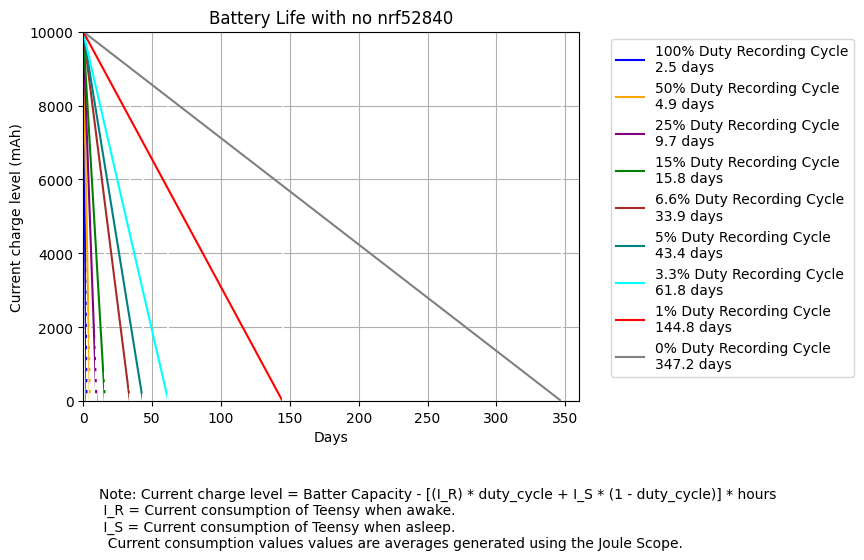

In [80]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 0
Duty_Cycle0 = 0
Duty_Cycle1 = 1
Duty_Cycle2 = 0.01
Duty_Cycle3 = 0.15
Duty_Cycle4 = 0.25
Duty_Cycle5 = 0.5
Duty_Cycle6 = 0.05
Duty_Cycle7 = 0.033
Duty_Cycle8 = 0.066


def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
  avg_current = ((record_current ) * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M
  num = str(round((battery_capacity / avg_current) / 24, 1))
  string = num + " days"
  return string


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life with no nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y(duty_cycle):
    avg_current = (I_R) * duty_cycle + I_S * (1 - duty_cycle) + I_M
    return BatteryCap - (avg_current * x_hours)

  y0 = calculate_y(Duty_Cycle0)  # Only sleep current for 0% duty cycle
  y1 = calculate_y(Duty_Cycle1)
  y2 = calculate_y(Duty_Cycle2)
  y3 = calculate_y(Duty_Cycle3)
  y4 = calculate_y(Duty_Cycle4)
  y5 = calculate_y(Duty_Cycle5)
  y6 = calculate_y(Duty_Cycle6)
  y7 = calculate_y(Duty_Cycle7)
  y8 = calculate_y(Duty_Cycle8)

  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, y1, label=f"100% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle1, BatteryCap)}", color="blue")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle1 + I_S * (1 - Duty_Cycle1))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y5, label=f"50% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle5, BatteryCap)}", color="orange")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle5 + I_S * (1 - Duty_Cycle5))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y4, label=f"25% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle4, BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle4 + I_S * (1 - Duty_Cycle4))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y3, label=f"15% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle3, BatteryCap)}", color="green")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle3 + I_S * (1 - Duty_Cycle3))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y8, label=f"6.6% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle8, BatteryCap)}", color="brown")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle8 + I_S * (1 - Duty_Cycle8))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y6, label=f"5% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle6, BatteryCap)}", color="teal")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle6 + I_S * (1 - Duty_Cycle6))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y7, label=f"3.3% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle7, BatteryCap)}", color="cyan")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle7 + I_S * (1 - Duty_Cycle7))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y2, label=f"1% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle2, BatteryCap)}", color="red")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle2 + I_S * (1 - Duty_Cycle2))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y0, label=f"0% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle0, BatteryCap)}", color="grey")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle0 + I_S * (1 - Duty_Cycle0))) / 24, color="white", linestyle="--")


  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
 

  plt.figtext(0.15, -0.2, "Note: Current charge level = Batter Capacity - [(I_R) * duty_cycle + I_S * (1 - duty_cycle)] * hours \n I_R = Current consumption of Teensy when awake. \n I_S = Current consumption of Teensy when asleep. \n  Current consumption values values are averages generated using the Joule Scope.", ha="left", fontsize=10, va="bottom")
  plt.ylim(0, 10000)
  plt.xlim(0, 360)
  plt.show()


# Example usage:
plot_linear_function()  # Still not needed for your battery plot

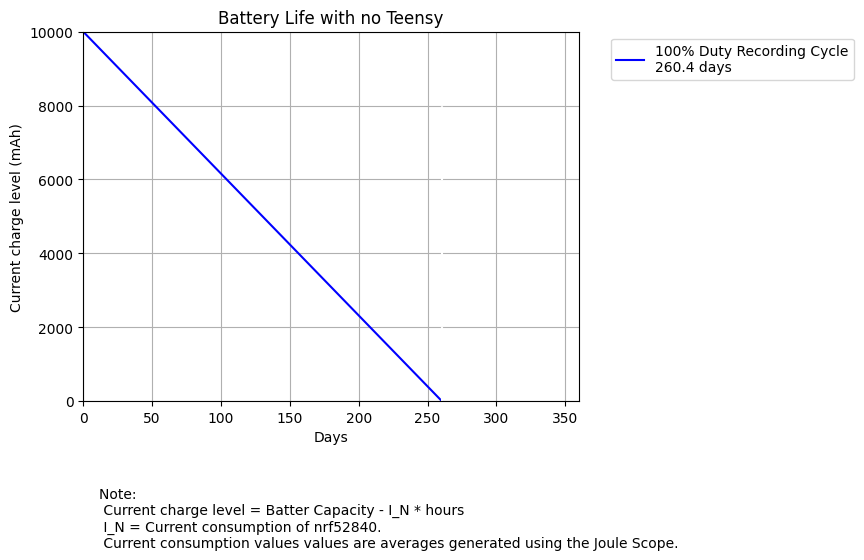

In [82]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 0  # Recording Current Consumption mA
I_S = 0  # Sleep Current Consumption mA
I_M = 1.6
Duty_Cycle0 = 0
Duty_Cycle1 = 1
Duty_Cycle2 = 0.01
Duty_Cycle3 = 0.15
Duty_Cycle4 = 0.25
Duty_Cycle5 = 0.5
Duty_Cycle6 = 0.05
Duty_Cycle7 = 0.033
Duty_Cycle8 = 0.066


def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
  avg_current = ((record_current ) * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M
  num = str(round((battery_capacity / avg_current) / 24, 1))
  string = num + " days"
  return string


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life with no Teensy",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y(duty_cycle):
    avg_current = (I_R) * duty_cycle + I_S * (1 - duty_cycle) + I_M
    return BatteryCap - (avg_current * x_hours)

  y0 = calculate_y(Duty_Cycle0)  # Only sleep current for 0% duty cycle
  y1 = calculate_y(Duty_Cycle1)
  y2 = calculate_y(Duty_Cycle2)
  y3 = calculate_y(Duty_Cycle3)
  y4 = calculate_y(Duty_Cycle4)
  y5 = calculate_y(Duty_Cycle5)
  y6 = calculate_y(Duty_Cycle6)
  y7 = calculate_y(Duty_Cycle7)
  y8 = calculate_y(Duty_Cycle8)

  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, y1, label=f"100% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle1, BatteryCap)}", color="blue")
  plt.axvline(x=(BatteryCap / (I_M)) / 24, color="white", linestyle="--")




  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
 

  plt.figtext(0.15, -0.2, "Note: \n Current charge level = Batter Capacity - I_N * hours \n I_N = Current consumption of nrf52840. \n Current consumption values values are averages generated using the Joule Scope.", ha="left", fontsize=10, va="bottom")
  plt.ylim(0, 10000)
  plt.xlim(0, 360)
  plt.show()


# Example usage:
plot_linear_function()  # Still not needed for your battery plot